# **19BCE259 - Smit Shah**
# **19BCE266 - Jainil Sokhadia**


Dataset - [Student Dataset](http://archive.ics.uci.edu/ml/datasets/Student+Performance)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import pandas as pd
import numpy as np

In [3]:
train_por = pd.read_csv('student-por.csv',sep=";")
train_mat  = pd.read_csv('student-mat.csv',sep=";")

In [4]:
train_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
train_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
train_por.shape

(649, 33)

In [7]:
train_mat.shape

(395, 33)

In [8]:
train_por.dropna().shape #no null values in train_por


(649, 33)

In [9]:
train_mat.dropna().shape #no null values in train_mat

(395, 33)

In [10]:
subset1=train_por.columns
subset2=train_mat.columns

In [11]:
train_por=train_por.drop_duplicates(subset=None, keep='first', inplace=False)
train_por.shape    #no duplicates in train_por

(649, 33)

In [12]:
train_mat=train_mat.drop_duplicates(subset=None, keep='first', inplace=False)
train_mat.shape    #no duplicates in train_mat

(395, 33)

In [13]:
#combinig datasets
train_por['subject']='Portuguese'
train_mat['subject']='Maths'
train=pd.concat([train_por, train_mat], axis=0) #combining two data files 
train.head()
train.shape

(1044, 34)

In [14]:
train.to_csv('students.csv', index=False)
# contains all the merged data
data = pd.read_csv('students.csv')
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')

In [15]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portuguese


In [20]:
# convert finalscore to categorical variable
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'A'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'B' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'C' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'D' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'F' 
data.head(5)

# data.drop(['Grade'],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,Portuguese,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,Portuguese,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,Portuguese,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,Portuguese,C
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,Portuguese,C


# Data visualization for different attributes

In [21]:
#number of males and female students
male_student = len(data[data['sex'] == 'M'])
female_student= len(data[data['sex'] == 'F'])

print('Number of male students:',male_student)
print('Number of female students:',female_student)

Number of male students: 453
Number of female students: 591


C:\Users\iamsm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


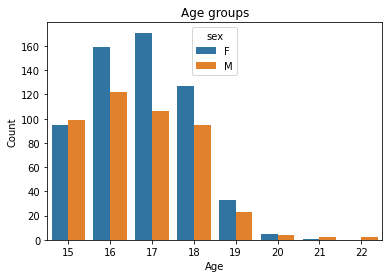

In [22]:
demo= sns.countplot('age',hue='sex', data=data)
demo.axes.set_title('Age groups')
demo.set_xlabel("Age")
demo.set_ylabel("Count")
plt.show()

Text(0.5, 1.0, 'School')

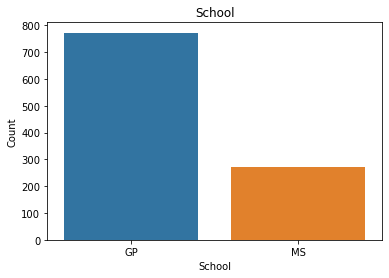

In [23]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'school', data=data)
ax = ax.set(ylabel="Count", xlabel="School")
figure.grid(False)
plt.title('School')

C:\Users\iamsm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


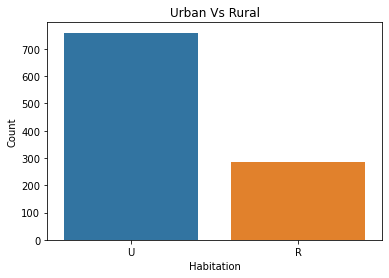

In [24]:
demo = sns.countplot(data['address'])
demo.axes.set_title('Urban Vs Rural',)
demo.set_xlabel('Habitation')
demo.set_ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Reason Distribution')

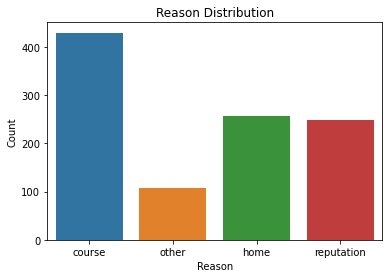

In [25]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'reason', data=data)
ax = ax.set(ylabel="Count", xlabel="Reason")
figure.grid(False)
plt.title('Reason Distribution')

Text(0.5, 1.0, 'Study Time')

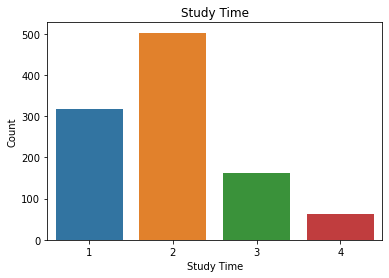

In [26]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'studytime', data=data)
ax = ax.set(ylabel="Count", xlabel="Study Time")
figure.grid(False)
plt.title('Study Time')

Text(0.5, 1.0, 'Travel Time')

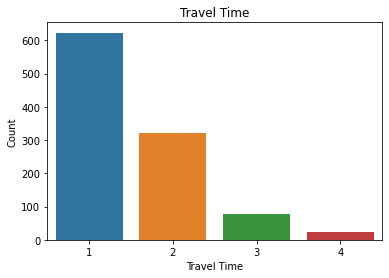

In [27]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'traveltime', data=data)
ax = ax.set(ylabel="Count", xlabel="Travel Time")
figure.grid(False)
plt.title('Travel Time')

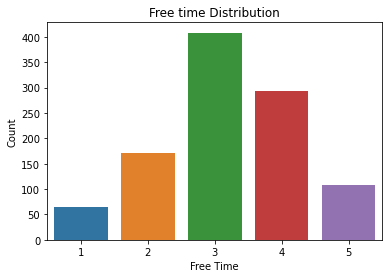

In [28]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'freetime', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Free Time")
figure.grid(False)
plt.title('Free time Distribution')
plt.savefig('free_time_plot.png', bbox_inches='tight')


Text(0.5, 1.0, 'Engaged in Extra-curricular activities')

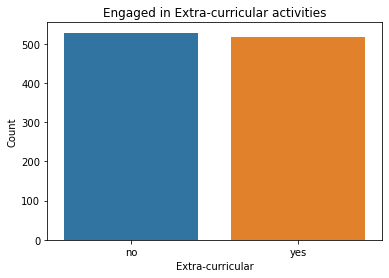

In [29]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'activities', data=data)
ax = ax.set(ylabel="Count", xlabel="Extra-curricular")
figure.grid(False)
plt.title('Engaged in Extra-curricular activities')

Text(0.5, 1.0, 'Guardian')

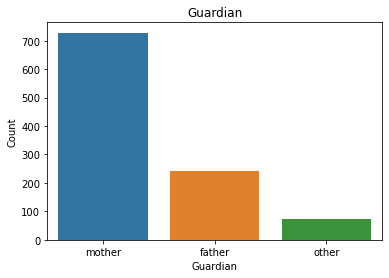

In [30]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'guardian', data=data)
ax = ax.set(ylabel="Count", xlabel="Guardian")
figure.grid(False)
plt.title('Guardian')

Text(0.5, 1.0, 'Family Educational Support')

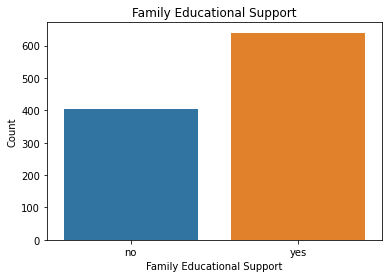

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsup', data=data)
ax = ax.set(ylabel="Count", xlabel="Family Educational Support")
figure.grid(False)
plt.title('Family Educational Support')

Text(0.5, 1.0, 'Extra Educational Support by School')

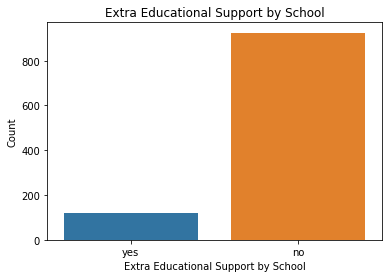

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'schoolsup', data=data)
ax = ax.set(ylabel="Count", xlabel="Extra Educational Support by School")
figure.grid(False)
plt.title('Extra Educational Support by School')

Text(0.5, 1.0, 'Past Class Failure')

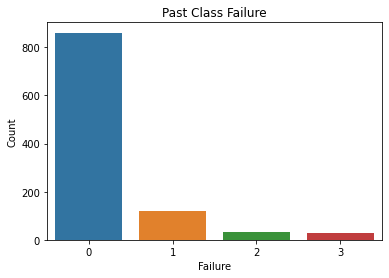

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'failures', data=data)
ax = ax.set(ylabel="Count", xlabel="Failure")
figure.grid(False)
plt.title('Past Class Failure')

Text(0.5, 1.0, 'Extra Classes')

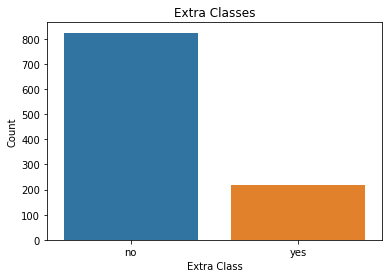

In [30]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'paid', data=data)
ax = ax.set(ylabel="Count", xlabel="Extra Class")
figure.grid(False)
plt.title('Extra Classes')

Text(0.5, 1.0, 'Intrested in Higher Education')

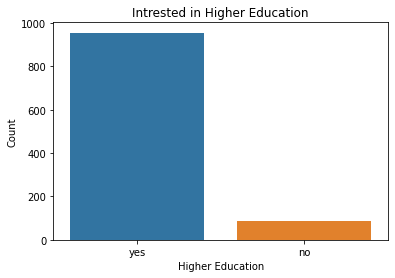

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'higher', data=data)
ax = ax.set(ylabel="Count", xlabel="Higher Education")
figure.grid(False)
plt.title('Interested in Higher Education')

Text(0.5, 1.0, 'In a Romantic Relationship')

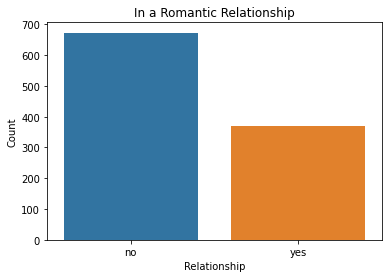

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'romantic', data=data)
ax = ax.set(ylabel="Count", xlabel="Relationship")
figure.grid(False)
plt.title('In a Romantic Relationship')

Text(0.5, 1.0, 'Quality of Family Relationship')

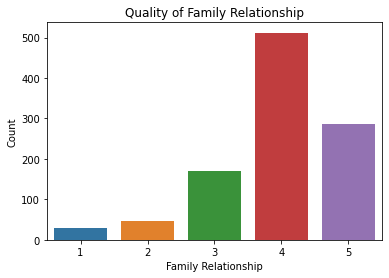

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famrel', data=data)
ax = ax.set(ylabel="Count", xlabel="Family Relationship")
figure.grid(False)
plt.title('Quality of Family Relationship')

Text(0.5, 1.0, 'Going out with friends')

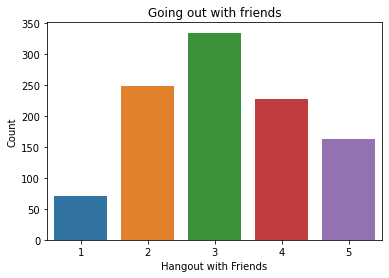

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'goout', data=data)
ax = ax.set(ylabel="Count", xlabel="Hangout with Friends")
figure.grid(False)
plt.title('Going out with friends')

Text(0.5, 1.0, 'Weekday Alcohol Consumption')

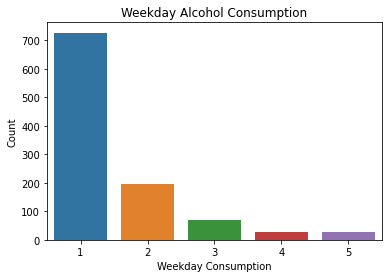

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Dalc', data=data)
ax = ax.set(ylabel="Count", xlabel="Weekday Consumption")
figure.grid(False)
plt.title('Weekday Alcohol Consumption')

Text(0.5, 1.0, 'Weekend Alcohol Consumption')

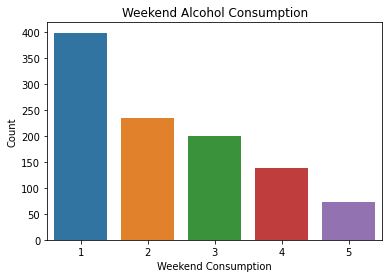

In [ ]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Walc', data=data)
ax = ax.set(ylabel="Count", xlabel="Weekend Consumption")
figure.grid(False)
plt.title('Weekend Alcohol Consumption')

# **Grade Analysis For different attributes**

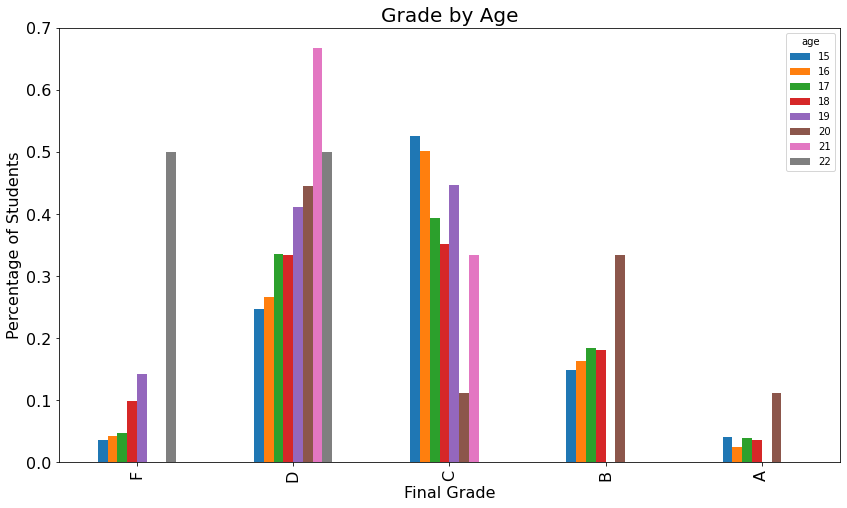

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']

relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.age)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Age', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**If a student is older than 20 years, he/she can't get good grades.**



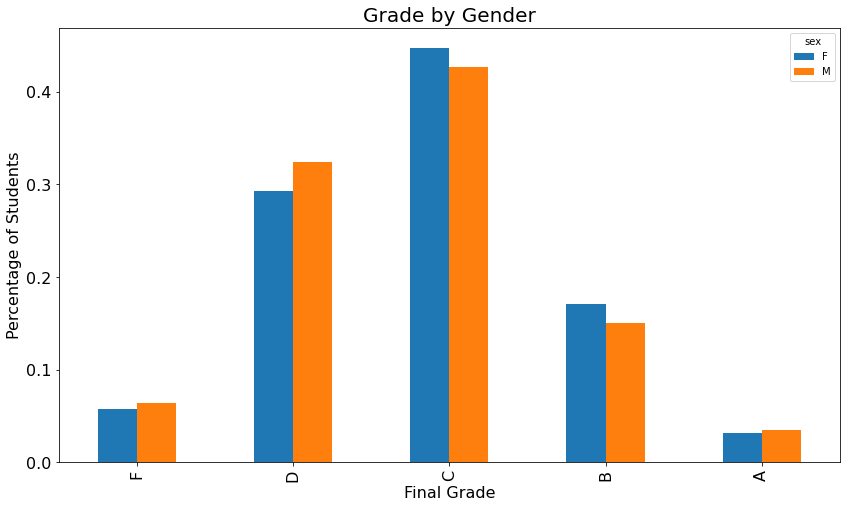

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.sex)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Gender', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Female students have slightly better performance in school than the male students.**

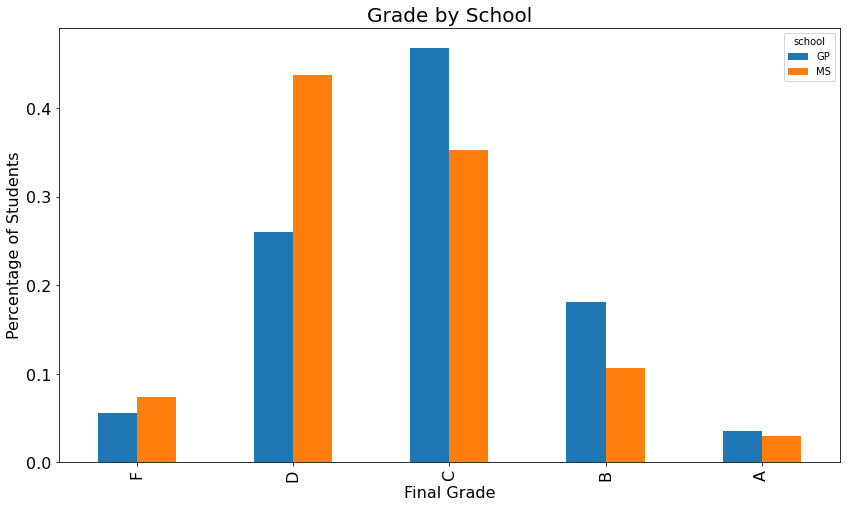

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.school)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by School', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**GP school students are smarter than MS school students**

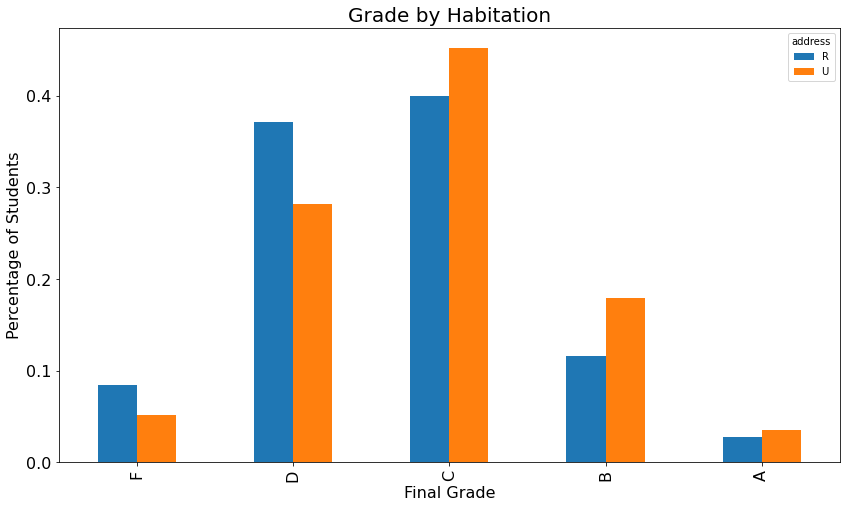

In [32]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.address)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Habitation', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Urban area students have greater grades**

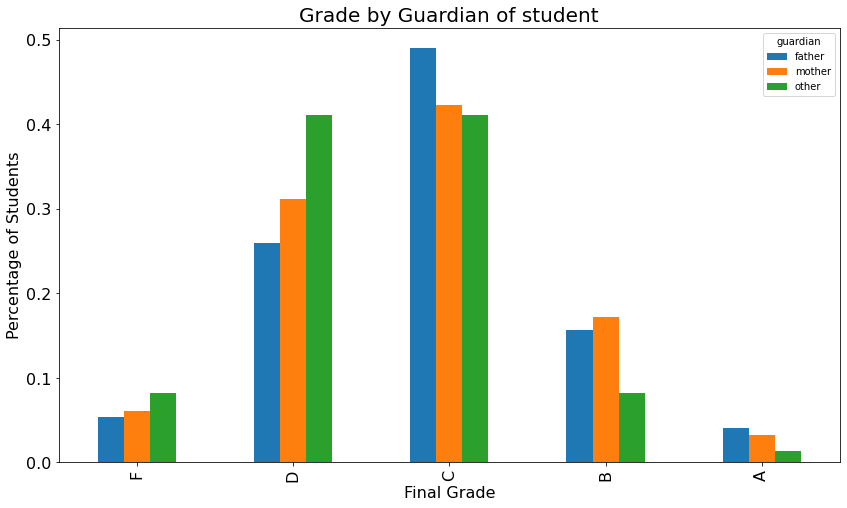

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.guardian)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Guardian of student', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Students who have their guardians other than their parents get less grades**

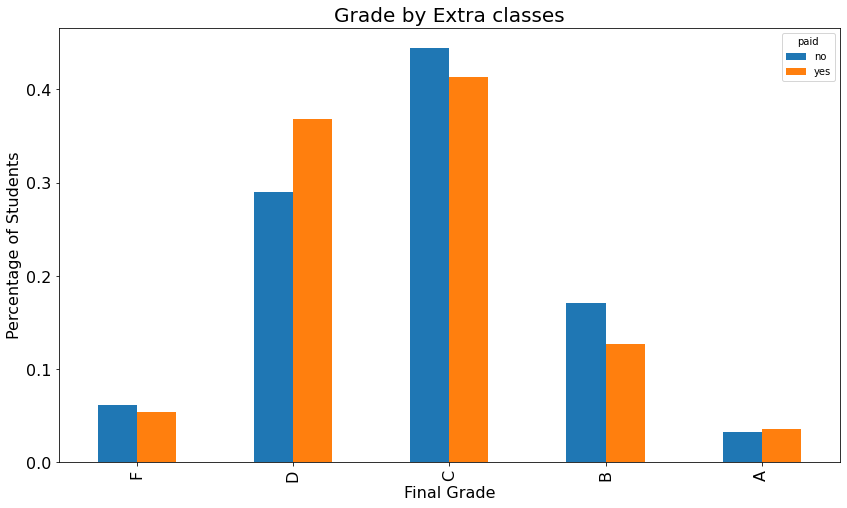

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.paid)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Extra classes', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Extra classes does not make any significant impact**

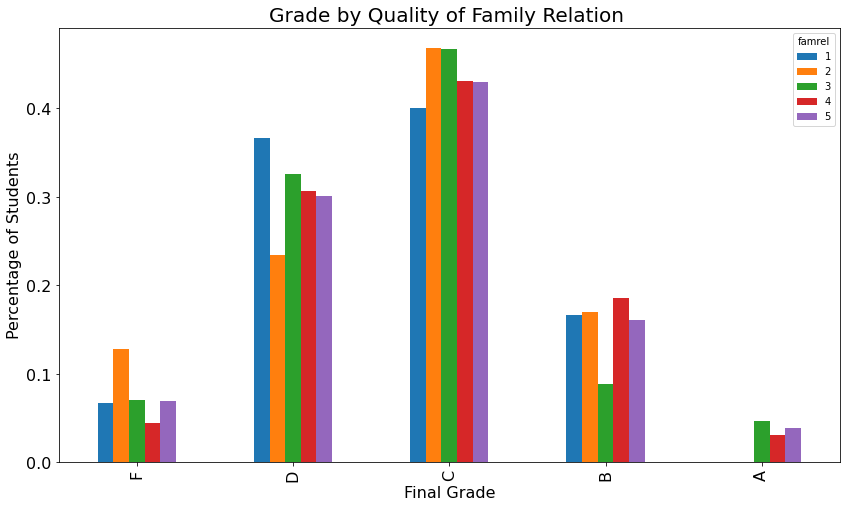

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.famrel)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Quality of Family Relation ', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()


**Having bad family relationship affects student's grade negatively**

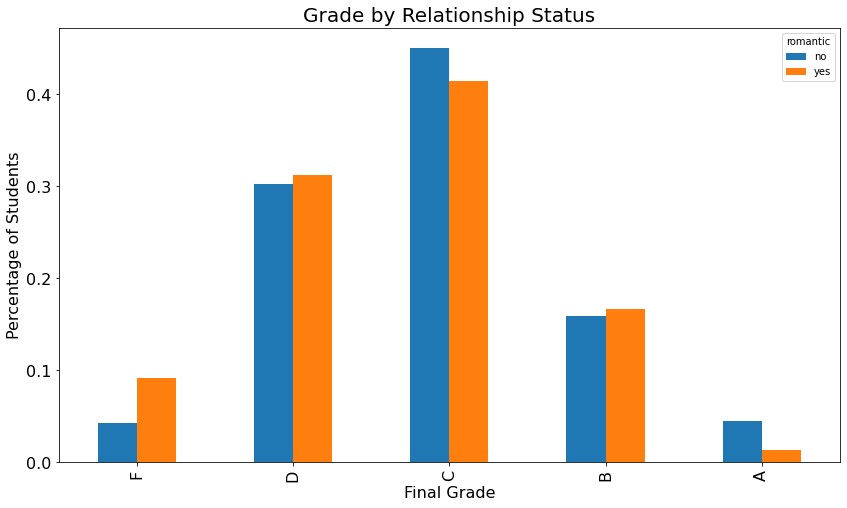

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.romantic)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Relationship Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

***Students who are in a Romantic relationship have an adverse effect on their studies and get less grades***

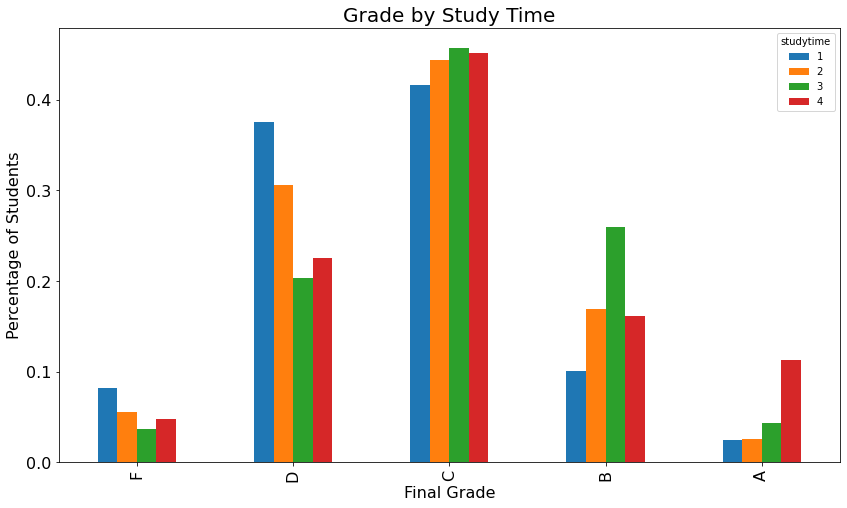

In [ ]:
index = ['F','D','C','B','A']
studytime_index = pd.crosstab(index=data.FinalGrade, columns=data.studytime)
studytime_index = studytime_index.apply(perc).reindex(index)
studytime_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Study Time', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Students who study more than 10 hours get good grades**

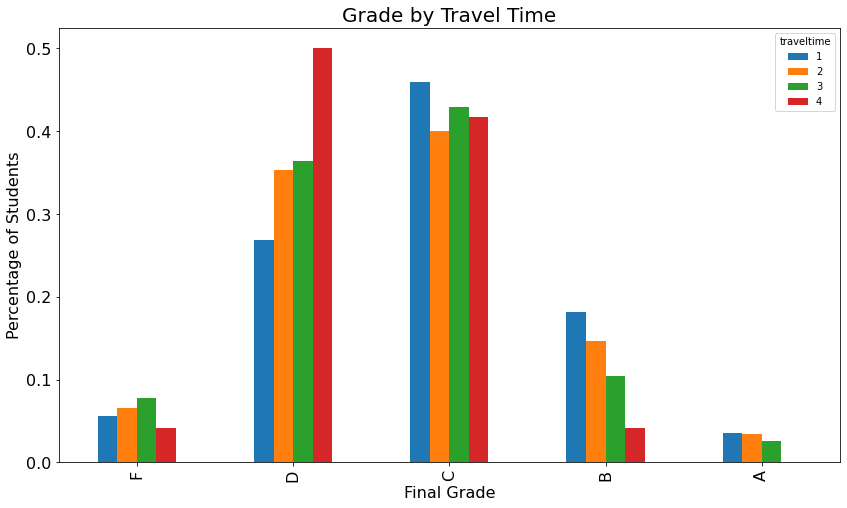

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.traveltime)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Travel Time', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Students who have more travel time for school, get badly affected in grade**

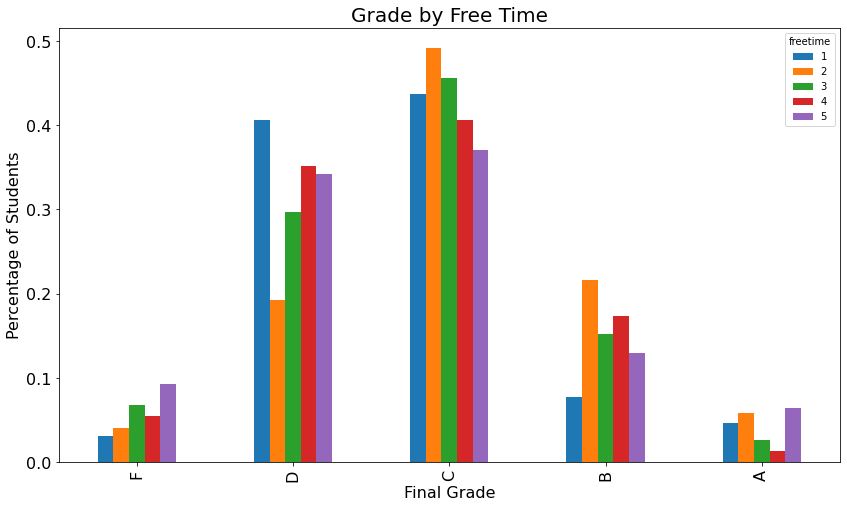

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.freetime)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Free Time', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Free time of students do not any such direct co-relation with grades**



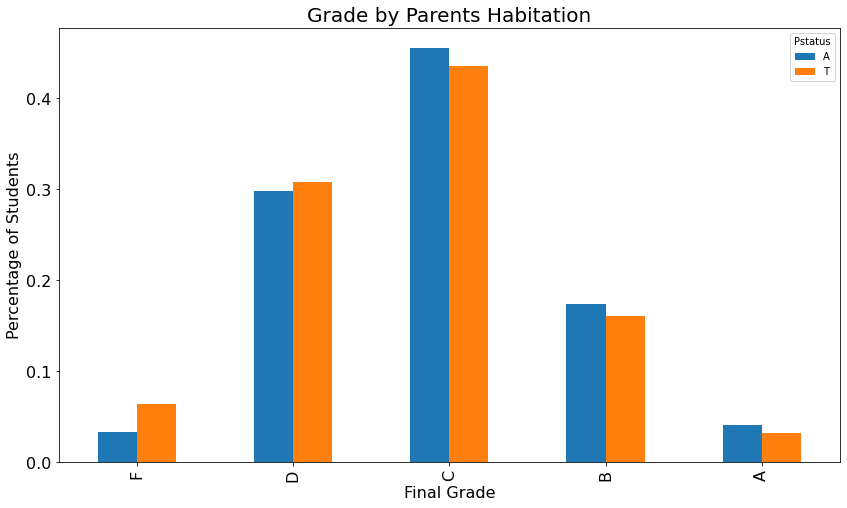

In [ ]:
index = ['F','D','C','B','A']
studytime_index = pd.crosstab(index=data.FinalGrade, columns=data.Pstatus)
studytime_index = studytime_index.apply(perc).reindex(index)
studytime_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Parents Habitation', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Parent's status of living together or apart does not affect the grades**

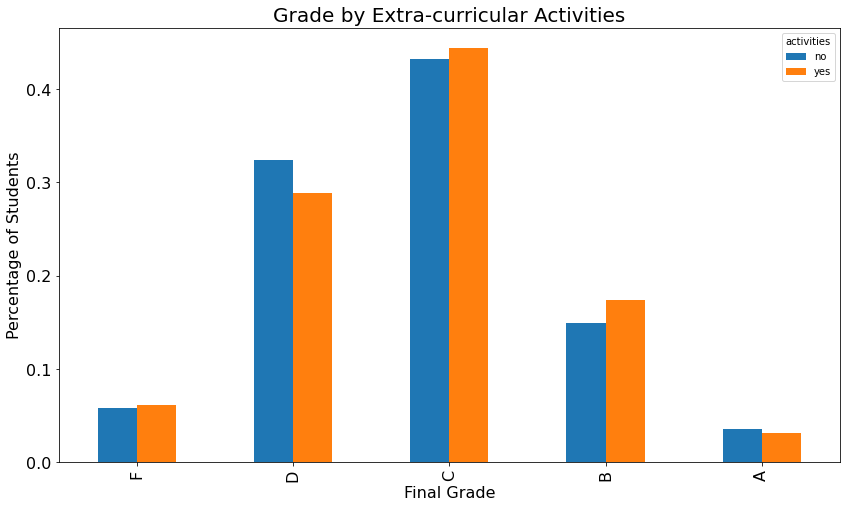

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.activities)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Extra-curricular Activities', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Students who are engaged in extra curricular activites do not have any inverse effect on grades**

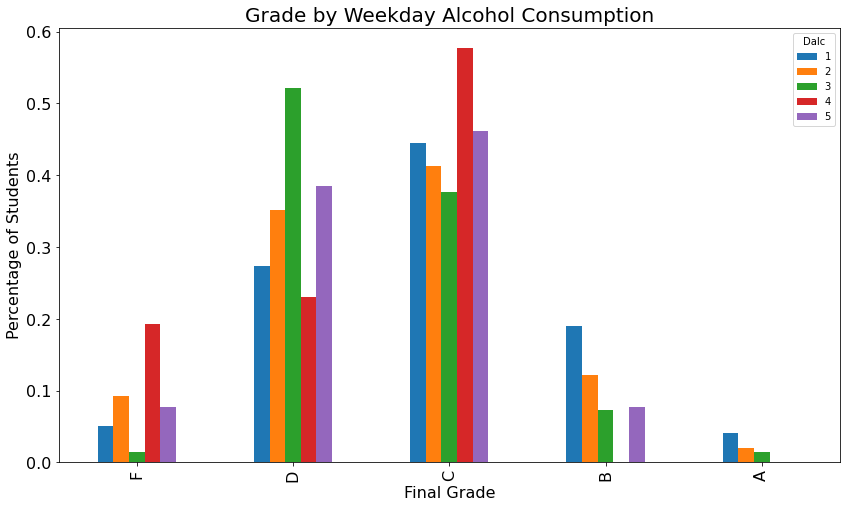

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.Dalc)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Weekday Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Less alcohol consumption leads to good grades**

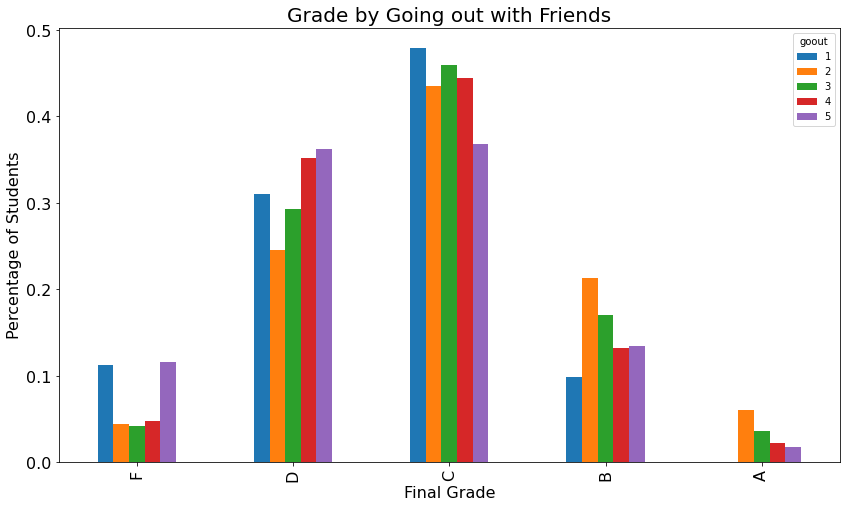

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.goout)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Going out with Friends', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Students who hang out with friends have not affected their performance much, but the students who hang out very frequently,tend to get less grades.**

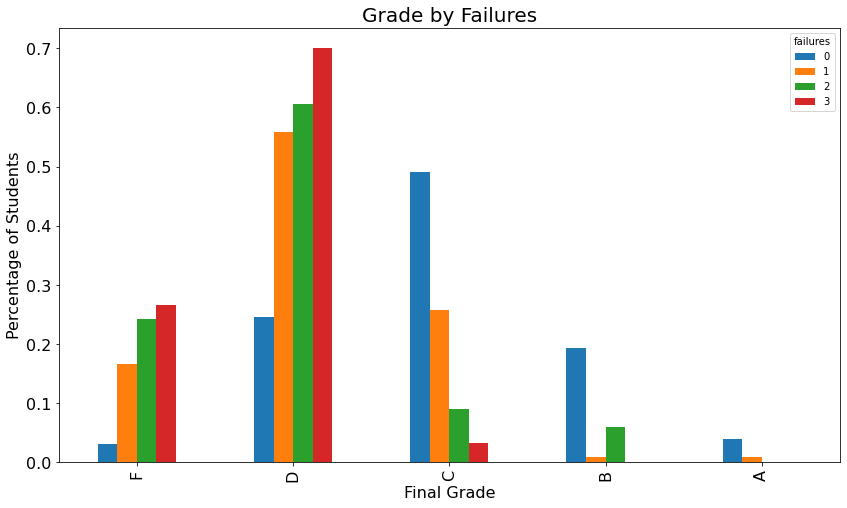

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.failures)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Failures', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Students who fail often have a very slim chance of getting good grades**

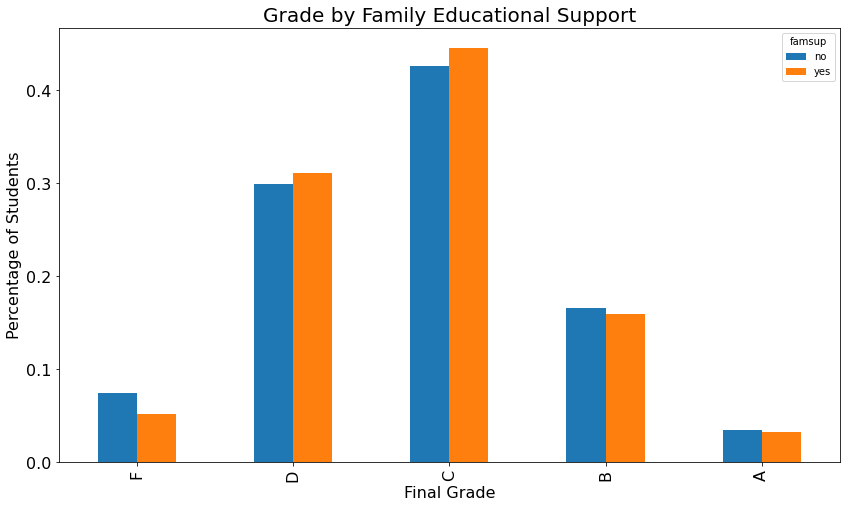

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.famsup)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Family Educational Support', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Family education support does not play an important role in student's grade**

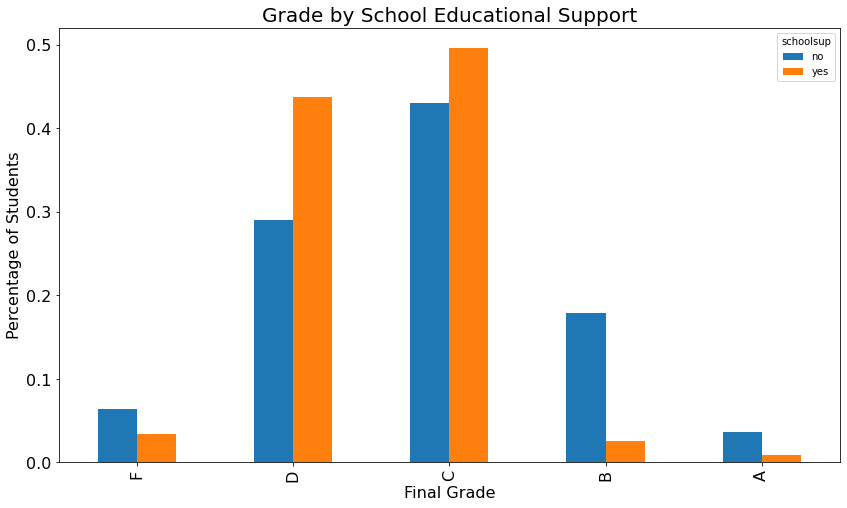

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.schoolsup)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by School Educational Support', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Even after getting educational support from school, students can't get good grades**

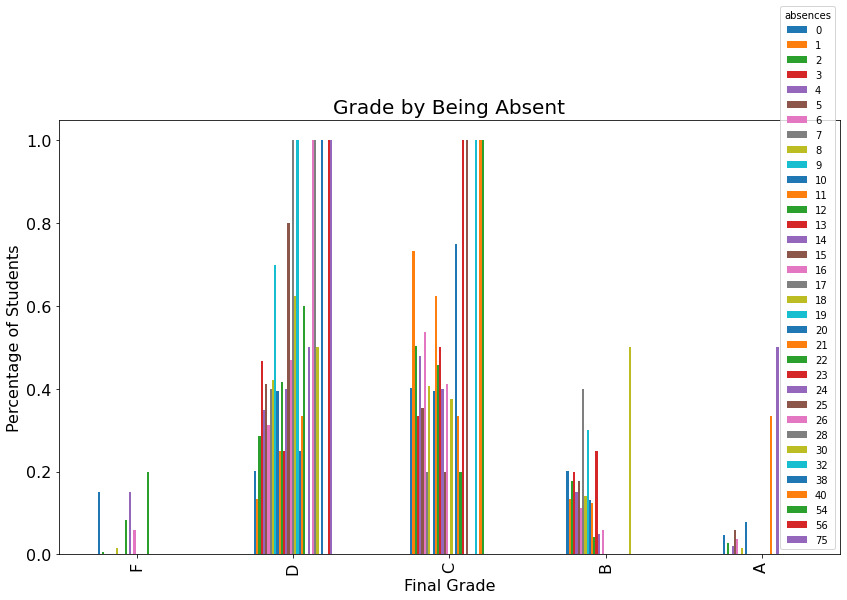

In [ ]:
perc = (lambda col: col/col.sum())
index = ['F','D','C','B','A']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.absences)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by Being Absent', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**Students who remain absent excessively either get very good grades or very bad grades**
        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


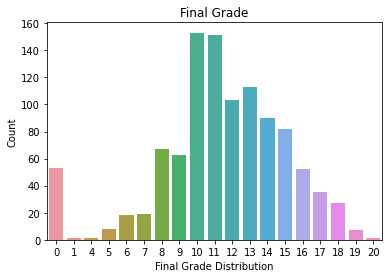

In [ ]:
#final grade count
b = sns.countplot(data['G3'])
b.axes.set_title("Final Grade")
b.set_xlabel("Final Grade Distribution")
b.set_ylabel("Count")
plt.show()

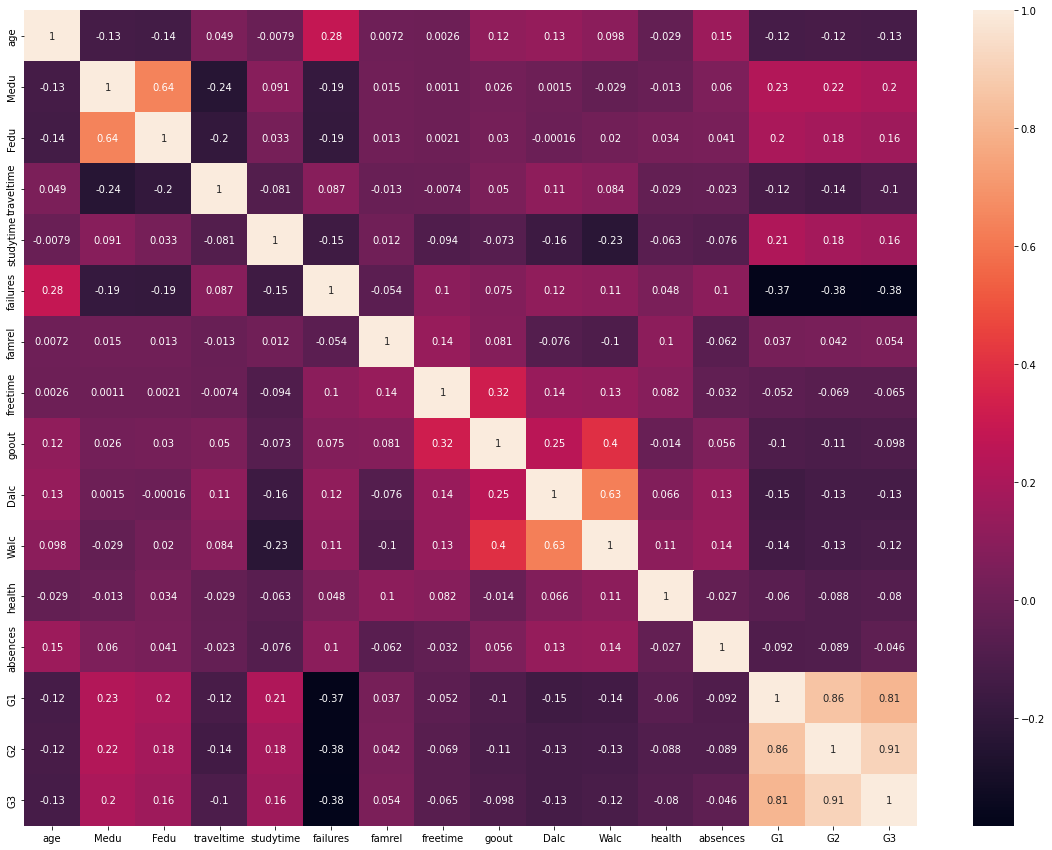

In [ ]:
#attributes most related with G3 using heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot= True, annot_kws={"size": 10})
plt.show()

# **Preparing dataset for ML models**

In [31]:
# create dataframe dfd for classification
dfd = data.copy()
dfd = dfd.drop([ 'G3'], axis=1)

In [32]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.FinalGrade)

<ipython-input-32-008a0bf504a1>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfd.final_grade = le.fit_transform(dfd.FinalGrade)


In [33]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('FinalGrade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [34]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [35]:
# see total number of features
len(list(X_train))

60

# **Decision tree classification**

In [36]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,len(list(X_train))):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

8    0.834395
dtype: float64

In [37]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=8)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.8438356164383561 , Cross Validation Score : 0.7993630573248408


# **SVC Model**

In [38]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.8191780821917808 , Cross Validation Score : 0.7547770700636943


# **Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [47]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,len(list(X_train))):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

1     0.818471
2     0.792994
3     0.802548
4     0.805732
5     0.070064
6     0.070064
7     0.070064
8     0.066879
9     0.070064
10    0.070064
11    0.070064
12    0.070064
13    0.070064
14    0.095541
15    0.108280
16    0.098726
17    0.092357
18    0.101911
19    0.108280
20    0.143312
21    0.162420
22    0.178344
23    0.171975
24    0.073248
25    0.089172
26    0.082803
27    0.092357
28    0.191083
29    0.152866
30    0.156051
31    0.197452
32    0.197452
33    0.732484
34    0.742038
35    0.773885
36    0.745223
37    0.773885
38    0.257962
39    0.267516
40    0.267516
41    0.267516
42    0.270701
43    0.267516
44    0.267516
45    0.270701
46    0.270701
47    0.267516
48    0.267516
49    0.601911
50    0.595541
51    0.579618
52    0.598726
53    0.582803
54    0.582803
55    0.582803
56    0.270701
57         NaN
dtype: float64

In [46]:
ks.where(ks==ks.max()).dropna()

1    0.818471
dtype: float64

In [47]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.8424657534246576 , Cross Validation Score : 0.33121019108280253


# **Model Selection**

<table>
  <tr>
    <th>Models</th>
    <th>Model Score</th>
    <th>Cross Validation Score</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.8424657534246576</td>
    <td>0.33121019108280253</td>
  </tr>
  <tr>
    <td>SVC Model</td>
    <td>0.8027397260273973</td>
    <td>0.821656050955414</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.8438356164383561</td>
    <td>0.8121019108280255</td>
  </tr>
</table>

From above model score and cross validation, the best model to be used is Decision Tree Model.